In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy import stats

In [2]:
df = pd.read_csv('babies.txt')
df.head(10)

,bwt smoke
0,120 0
1,113 0
2,128 1
3,123 0
4,108 1
5,136 0
6,138 0
7,132 0
8,120 0
9,143 1


In [3]:
df[['bwt', 'smoke']] = df['bwt smoke'].str.split(expand = True)
df = df.drop(columns = ['bwt smoke'])
# Xử lý dữ liệu bằng cách tách giá trị từ cột bwt smoke thành 2 cột riêng biệt là bwt và smoke.

In [4]:
df['smoke'] = df['smoke'].astype('int64')
df['bwt'] = df['bwt'].astype('int64')
df.dtypes
# Chuyển đổi dữ liệu của 2 cột smoke và bwt thành int64.

bwt      int64
smoke    int64
dtype: object

In [5]:
df_smoke = df[(df['smoke'] == 0) | (df['smoke'] == 1)]

def Q1(g): return np.percentile(g, 25)

def Q2(g): return np.percentile(g, 50)

def Q3(g): return np.percentile(g, 75)

def var(g): return np.var(g)

def IQR(g): return Q3(g) - Q1(g)

def skew(g): return scipy.stats.skew(g, bias = False)

def kurtosis(g): return scipy.stats.kurtosis(g, bias = False)

pd.pivot_table(data = df_smoke, index = 'smoke', aggfunc = [
    'count', 'min', 'max', 'mean', 'std', var, 'median', Q1, Q2, Q3, IQR, skew, kurtosis]
)
# Sử dụng bảng pivot table để thống kê dữ liệu trên cột smoke

,count,min,max,mean,std,var,median,Q1,Q2,Q3,IQR,skew,kurtosis
,bwt,bwt,bwt,bwt,bwt,bwt,bwt,bwt,bwt,bwt,bwt,bwt,bwt
smoke,,,,,,,,,,,,,
0,742,55,176,123.047170,17.398689,302.306400,123,113,123,134,21,-0.187363,1.052213
1,484,58,163,114.109504,18.098946,326.895034,115,102,115,126,24,-0.033700,0.000408


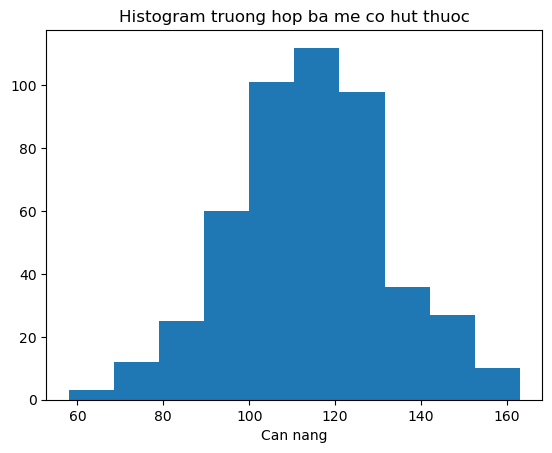

In [6]:
df_smoke = df[df['smoke'] == 1]
plt.hist(df_smoke['bwt'])
plt.title('Histogram truong hop ba me co hut thuoc')
plt.xlabel('Can nang')
plt.show()
# dùng matplotlib để vẽ biểu đồ histogram trường hợp bà mẹ có hút thuốc

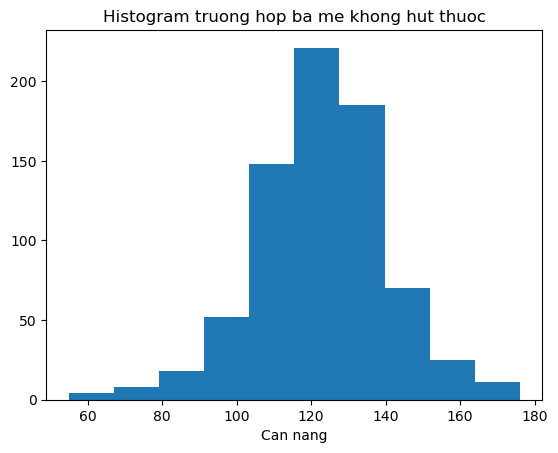

In [7]:
df_no_smoke = df[df['smoke'] == 0]
plt.title("Histogram truong hop ba me khong hut thuoc")
plt.hist(df_no_smoke['bwt'])
plt.xlabel('Can nang')
plt.show()
# dùng matplotlib để vẽ biểu đồ histogram trường hợp bà mẹ không hút thuốc

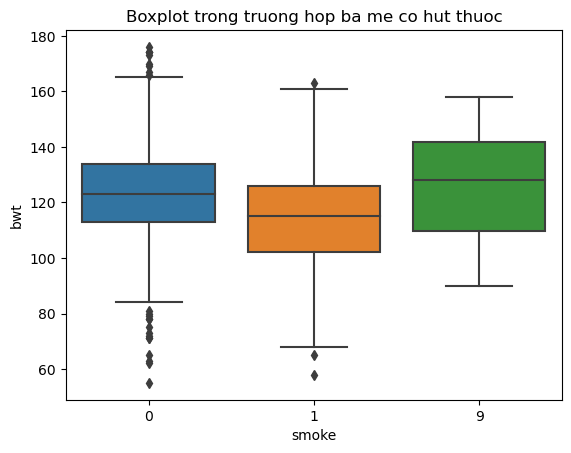

In [8]:
sns.boxplot(x = 'smoke', y = 'bwt', data = df)
plt.title("Boxplot trong truong hop ba me co hut thuoc")
plt.show()
# dùng thư viện boxplot trong seaborn để visualize dữ liệu của 2 cột smoke và bwt

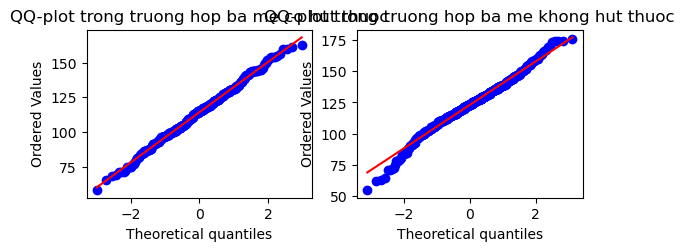

In [9]:
df_smoke = df[(df['smoke'] == 1)]
df_no_smoke = df[(df['smoke'] == 0)]
figure = plt.figure()
ax = figure.add_subplot(2, 2, 1)
stats.probplot(df_smoke['bwt'], plot = ax)
ax.set_title('QQ-plot trong truong hop ba me co hut thuoc')


ax1 = figure.add_subplot(2, 2, 2)
stats.probplot(df_no_smoke['bwt'], plot = ax1)
ax1.set_title('QQ-plot trong truong hop ba me khong hut thuoc')
plt.show()

# dùng hàm probplot trong thư viện stats để visualize dữ liệu.